In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
import os
from collections import Counter, defaultdict

In [47]:
df_trdc = pd.read_json('results_trdc.json')
df_trdc["avg_timing"] = df_trdc["timings"].apply(lambda x: sum(map(int, x)) / (1e9 * len(x)))
# df_trdc.drop(columns=["timings"], inplace=True)
df_trdc.head()

,file,directory,result,timings,avg_timing
0,cond-args.bril,df,@main(cond: bool) {\n a: int = const 47;\n b...,"[110625024, 110551808, 109242880, 118065920, 1...",0.114256
1,cond.bril,df,@main {\n a: int = const 47;\n cond: bool = ...,"[120187904, 118840064, 115720960, 113426944, 1...",0.117535
2,fact.bril,df,@main {\n result: int = const 1;\n i: int = ...,"[116623104, 109816064, 114360832, 117615104, 1...",0.115180
3,loopcond.bril,dom,@main {\n.entry:\n x: int = const 0;\n i: in...,"[114001152, 110830080, 115067904, 115604992, 1...",0.115556
4,while.bril,dom,@main(a: int) {\n.while.cond:\n zero: int = c...,"[115047168, 112787200, 109991168, 113532160, 1...",0.111835


In [48]:
df_rdcl = pd.read_json('results_rdcl.json')
df_rdcl["avg_timing"] = df_rdcl["timings"].apply(lambda x: sum(map(int, x)) / (1e9 * len(x)))
# df_rdcl.drop(columns=["timings"], inplace=True)
df_rdcl.head()

,file,directory,result,timings,avg_timing
0,cond-args.bril,df,@main(cond: bool) {\n a: int = const 47;\n b...,"[111983872, 107171840, 106326016, 106234880, 1...",0.118266
1,cond.bril,df,@main {\n a: int = const 47;\n b: int = cons...,"[117001216, 112922880, 114854144, 112893952, 1...",0.112703
2,fact.bril,df,@main {\n result: int = const 1;\n i: int = ...,"[114193152, 108733952, 110552064, 111350016, 1...",0.109511
3,loopcond.bril,dom,@main {\n.entry:\n x: int = const 0;\n i: in...,"[112920064, 109803008, 110540032, 112099072, 1...",0.111044
4,while.bril,dom,@main(a: int) {\n.while.cond:\n zero: int = c...,"[109410816, 105584128, 106031104, 105216768, 1...",0.105738


In [49]:
df_lvn = pd.read_json('results_lvn.json')
df_lvn["avg_timing"] = df_lvn["timings"].apply(lambda x: sum(map(int, x)) / (1e9 * len(x)))
# df_lvn.drop(columns=["timings"], inplace=True)
df_lvn.head()

,file,directory,result,timings,avg_timing
0,cond-args.bril,df,@main(cond: bool) {\n br cond .left .right;\n...,"[114022144, 108038144, 113118976, 114241024, 1...",0.118172
1,cond.bril,df,@main {\n cond: bool = const true;\n br cond...,"[113235968, 110502912, 110640896, 108791808, 1...",0.109985
2,fact.bril,df,@main {\n result: int = const 1;\n i: int = ...,"[118225920, 114777088, 114284032, 114920960, 1...",0.112781
3,loopcond.bril,dom,@main {\n.entry:\n x: int = const 0;\n one: ...,"[120337920, 116084992, 117076992, 118703872, 1...",0.118735
4,while.bril,dom,@main(a: int) {\n.while.cond:\n zero: int = c...,"[115137024, 116022016, 115858176, 114139136, 1...",0.116096


In [50]:
BASE_DIR = "../../examples/test/"
ext = ".bril"
res = defaultdict(list)
avg = 0
assert len(df_trdc) == len(df_rdcl) == len(df_lvn)
dfs = ["trdc", "rdcl", "lvn"]
for i in range(len(df_trdc)):
    j = 0
    for data in [df_trdc.iloc[i], df_rdcl.iloc[i], df_lvn.iloc[i]]:
        k = data["file"].split(".")[0]
        d = data["directory"]
        filename = BASE_DIR + d + '/' + k + ext

        s = []
        with open(filename, 'r') as f:
            for line in f:
                s.append(line)
        num_lines_before = len(s)
        num_lines_after = data["result"].count('\n')
        diff = num_lines_before - num_lines_after
        # res[d+'+'+k] += [{dfs[j]: diff}]
        # k = d + '+' + k
        res[k] += [{dfs[j]: diff}]
        if j == 2:
            b = True
            num_lines_out = num_lines_before
            ext_out = ".out"
            pref = BASE_DIR + d + '/' + k
            filename = pref + ext_out
            s = []
            if not os.path.exists(filename):
                lst = glob.glob(pref + "*.out")
                if len(lst) == 0:
                    print(j, "No out file found for", pref)
                    b = False
                else:
                    filename = lst[0]
                    b = True
            if b:
                with open(filename, 'r') as f:
                    for line in f:
                        s.append(line)
            num_lines_out = len(s)
            res[k].append({".out": num_lines_before - num_lines_out})
        avg += diff
        j += 1
avg /= len(df_trdc) * 3
res = dict(res)
len(res)

2 No out file found for ../../examples/test/dom/loopcond
2 No out file found for ../../examples/test/dom/while


38

In [51]:
res

{'cond-args': [{'trdc': 3}, {'rdcl': 1}, {'lvn': 5}, {'.out': 4}],
 'cond': [{'trdc': 3}, {'rdcl': 1}, {'lvn': 5}, {'.out': 5}],
 'fact': [{'trdc': 8}, {'rdcl': 8}, {'lvn': 10}, {'.out': 10}],
 'loopcond': [{'trdc': 7}, {'rdcl': 7}, {'lvn': 9}, {'.out': 30}],
 'while': [{'trdc': 1},
  {'rdcl': 1},
  {'lvn': 1},
  {'.out': 12},
  {'trdc': 2},
  {'rdcl': 2},
  {'lvn': 2},
  {'.out': 12},
  {'trdc': 1},
  {'rdcl': 1},
  {'lvn': 1},
  {'.out': -7}],
 'clobber-arg': [{'trdc': 1}, {'rdcl': 1}, {'lvn': 4}, {'.out': 0}],
 'clobber-fold': [{'trdc': 11}, {'rdcl': 10}, {'lvn': 15}, {'.out': 17}],
 'clobber': [{'trdc': 11}, {'rdcl': 10}, {'lvn': 15}, {'.out': 14}],
 'commute': [{'trdc': 3}, {'rdcl': 3}, {'lvn': 4}, {'.out': 2}],
 'divide-by-zero': [{'trdc': 1}, {'rdcl': 1}, {'lvn': 1}, {'.out': 0}],
 'fold-comparisons': [{'trdc': 19}, {'rdcl': 6}, {'lvn': 21}, {'.out': 5}],
 'idchain-nonlocal': [{'trdc': 2}, {'rdcl': 2}, {'lvn': 2}, {'.out': 1}],
 'idchain-prop': [{'trdc': 2}, {'rdcl': 2}, {'lvn':

<Figure size 640x480 with 0 Axes>

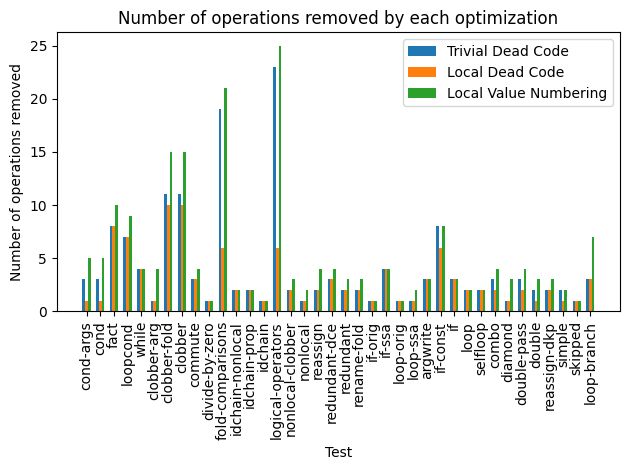

In [52]:
fig = plt.figure()

data = res

keys = list(data.keys())
categories = ['trdc', 'rdcl', 'lvn', '.out']
values = {category: [] for category in categories}

for key in keys:
    for category in categories:
        total = sum(d.get(category, 0) for d in data[key])
        values[category].append(total)

x = np.arange(len(keys))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - width, values['trdc'], width, label='Trivial Dead Code')
ax.bar(x, values['rdcl'], width, label='Local Dead Code')
ax.bar(x + width, values['lvn'], width, label='Local Value Numbering')
# ax.bar(x + 2 * width, values['.out'], width, label='BRIL Interpreter')

ax.set_xlabel('Test')
ax.set_ylabel('Number of operations removed')
ax.set_title('Number of operations removed by each optimization')
ax.set_xticks(x)
ax.set_xticklabels(keys, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

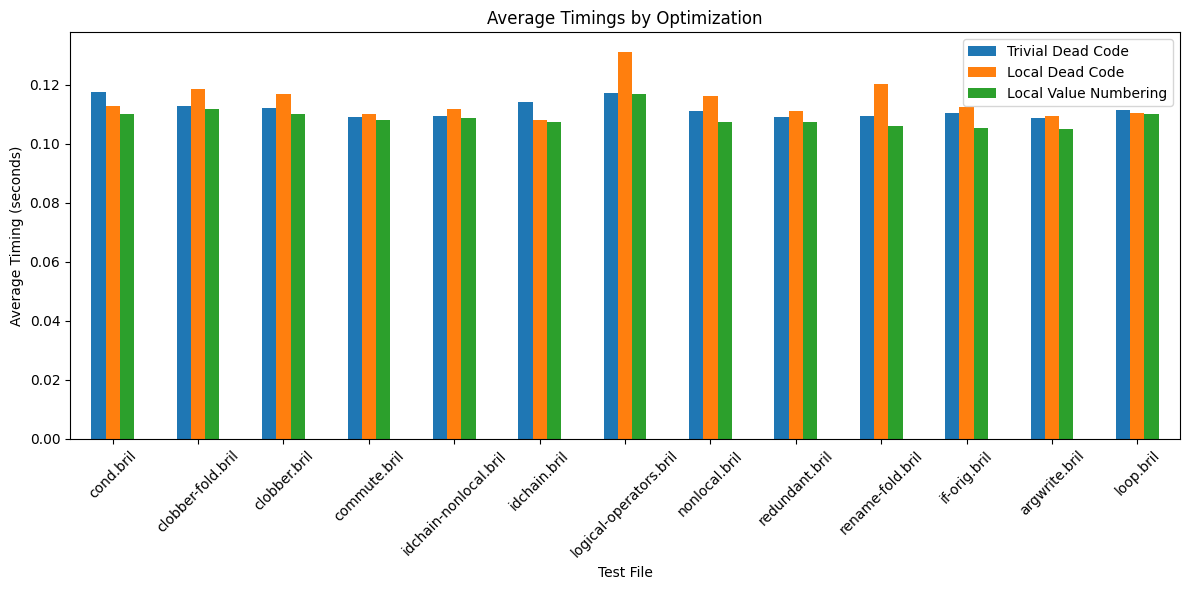

In [60]:
fig = plt.figure()

# We only use the indices below
selected = [1, 6, 7, 8, 11, 13, 14, 16, 19, 20, 21, 25, 28]

combined_df = pd.DataFrame({
    'file': df_trdc[df_trdc.index.isin(selected)]['file'],
    'Trivial Dead Code': df_trdc[df_trdc.index.isin(selected)]['avg_timing'],
    'Local Dead Code': df_rdcl[df_rdcl.index.isin(selected)]['avg_timing'],
    'Local Value Numbering': df_lvn[df_lvn.index.isin(selected)]['avg_timing'],
})

plt.figure(figsize=(10, 6))
combined_df.plot(x='file', kind='bar', figsize=(12, 6))

plt.title('Average Timings by Optimization')
plt.ylabel('Average Timing (seconds)')
plt.xlabel('Test File')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show();